# Exploratory Data Analysis

**_Author: Ron Schulz_**

**Role: Principal Analyst**

**Subject: Hotel Bookings**

    
## Summary


This is an exploratory data analysis (EDA) for the travel industry. It explores different ways of visualizing the data to understand relationships between variables better. It includes descriptive statistics and plots to draw new insights. This is designed to demonstrate familiarity and comfort with Python coding used for EDA. The analysis becomes increasingly complex, exhausting several techniques to understand the data.

The dataset used in this analysis contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. More detailed information about the dataset (hotel_bookings.csv) can be found [here](https://github.com/rjschulzjr/analyst-port).

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as sp
import seaborn as sns

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/hotel_bookings.csv")

In [3]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
# Arrival date total counts by year [Fomat: Series]
arr_yr_cnt = df['arrival_date_year'].value_counts() 
arr_yr_cnt

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [11]:
# On average, how far in advance do people book their reservation? Compute the median for the lead_time column ignoring NaN values.
advbook = np.nanmedian(df['lead_time']) 
advbook

69.0

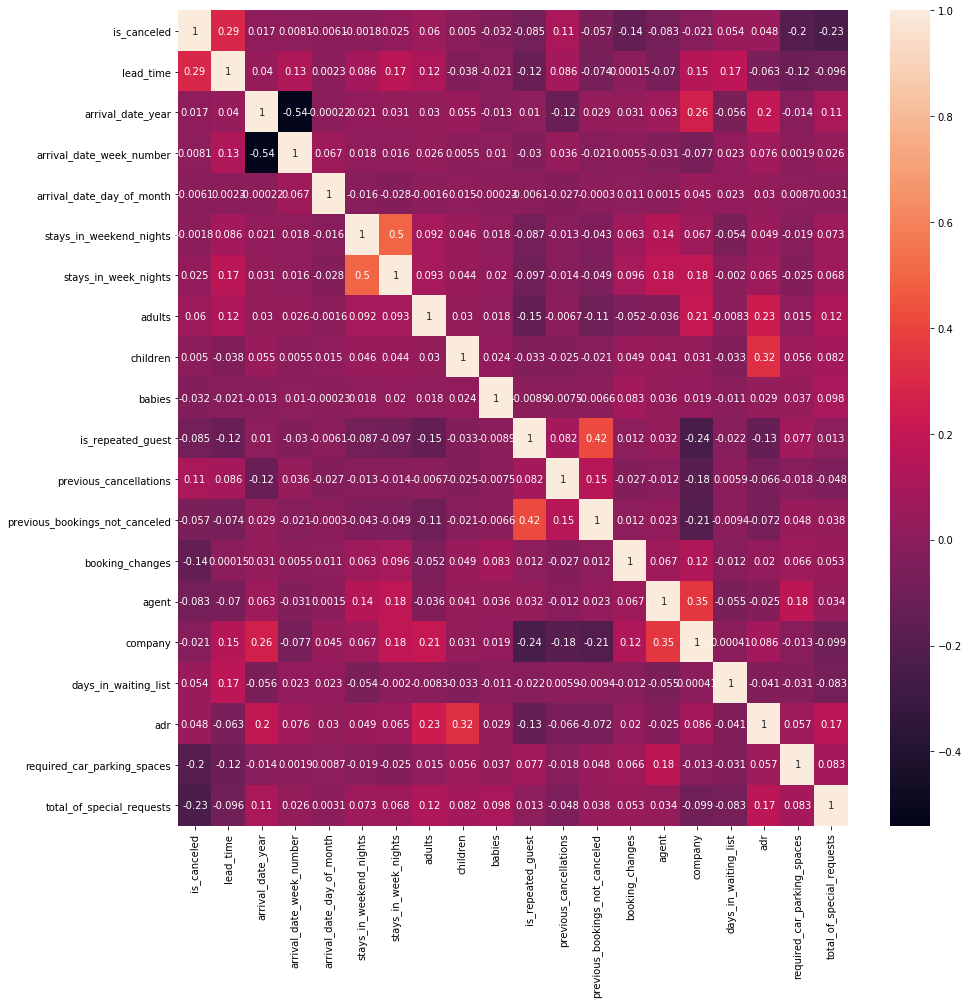

In [13]:
# Heatmap to compare variables or columns within the dataset
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.savefig("results/plot4.png") # saved to results folder

In [18]:
# Determine how many adults require a parking space. This is a feature engineering step to create new measurment column in the dataframe.
df['parking_spaces_per_adult'] = (df['adults']/df['required_car_parking_spaces'])
df.head(2000)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,parking_spaces_per_adult
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,inf
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,inf
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,inf
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,inf
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Resort Hotel,1,75,2015,September,39,26,1,1,2,...,240.0,NaN,0,Transient,73.35,0,1,Canceled,2015-07-17,inf
1996,Resort Hotel,1,59,2015,September,39,26,1,1,2,...,208.0,NaN,0,Transient,74.00,0,0,Canceled,2015-08-24,inf
1997,Resort Hotel,1,61,2015,September,39,26,2,1,2,...,240.0,NaN,0,Transient,79.00,0,0,Canceled,2015-08-27,inf
1998,Resort Hotel,1,61,2015,September,39,26,2,1,2,...,240.0,NaN,0,Transient,79.00,0,2,Canceled,2015-08-27,inf


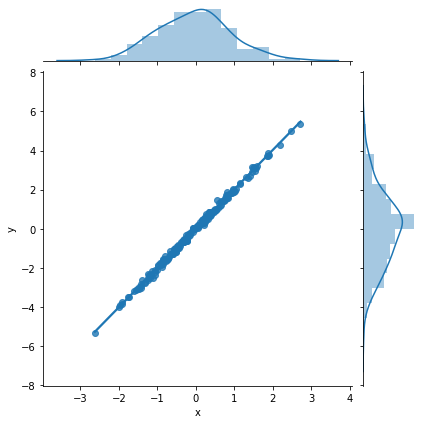

In [23]:
# High Correlation Jointplot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate some highly correlated data
np.random.seed(42)
x = np.random.normal(0, 1, 200)
y = 2 * x + np.random.normal(0, 0.1, 200)  # y is highly correlated with x

data = pd.DataFrame({'x': x, 'y': y})

# Create the jointplot
sns.jointplot(x='x', y='y', data=data, kind='reg')
plt.show()

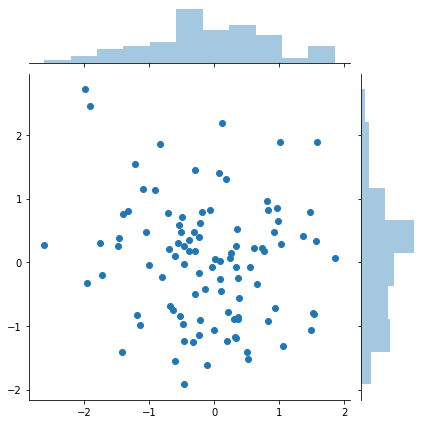

In [21]:
# Low Correlation Jointplot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate two variables with low correlation
np.random.seed(42)
x = np.random.randn(100)
y = np.random.randn(100)  # Independent of x

# Create a jointplot
sns.jointplot(x=x, y=y, kind='scatter')
plt.show()

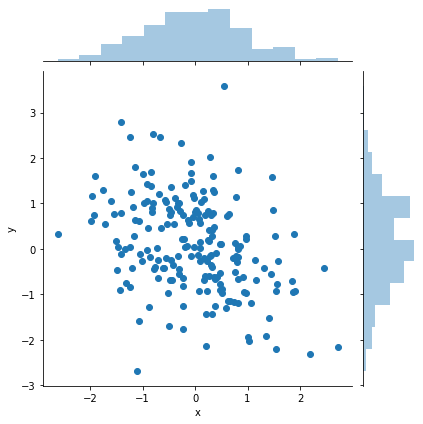

In [22]:
# Jointplot with correlation close to -0.5
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create reproducible random data with a correlation near -0.5
np.random.seed(42)
x = np.random.normal(0, 1, 200)
# Generate y such that its relationship with x gives a correlation around -0.5
y = -0.5 * x + np.random.normal(0, 1, 200)

# Put data into a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Create the jointplot
sns.jointplot(x='x', y='y', data=df, kind='scatter')
plt.show()

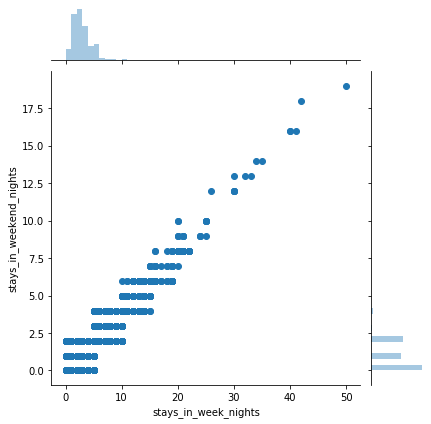

In [19]:
# Jointplot that compares the relationship between stays on weekdays vs. weekends
sns.jointplot(df.stays_in_week_nights, df.stays_in_weekend_nights)   

plt.savefig("results/plot6.png")

A seaborn jointplot with a high correlation will typically show a scatter plot where the data points are tightly clustered along a straight line—often near the diagonal if the correlation is positive. In such a plot:

**Scatter Area:** The points will lie close to a linear trend, indicating that as one variable increases, the other does too (or decreases, for a negative correlation).

**Marginal Distributions:** The histograms or KDE plots on the top and right margins will reflect the concentrated distribution of each variable, often with similar shapes if the correlation is strong.

**Regression Line (if using kind="reg"):** You might also see a fitted regression line that almost perfectly captures the trend of the data.

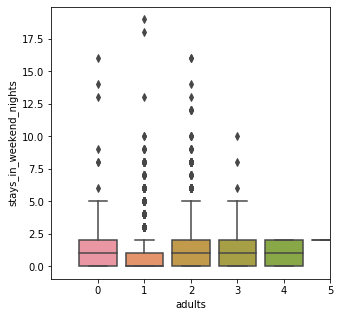

In [30]:
# group size vs. the impact to stay the weekend
plt.figure(figsize=(5, 5))
sns.boxplot(df['adults'], df['stays_in_weekend_nights'])   
plt.xlim([-1, 5])

plt.savefig("results/plot8.png")

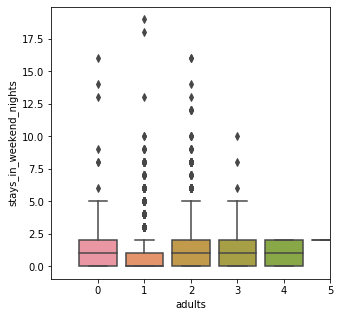

In [31]:
# alternatively
plt.figure(figsize=(5, 5))
sns.boxplot(x='adults', y='stays_in_weekend_nights', data=df)
plt.xlim([-1, 5])
plt.savefig("results/plot8.png")

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-03


In [38]:
# split the reservation dates into three seperate columns representing month, day, and year.

df['date'] = pd.to_datetime(df['reservation_status_date'])
print(df['date'])

#df['year'] = df['date'].year
#df['month'] = df['date'].month
#df['day'] = df['date'].day

df.head()

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: date, Length: 119390, dtype: datetime64[ns]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-03
